# Multiclass classification

1. Become with data 
2. preprocess the data
3. create a model
4. fit the model 
5. evaulate the model
6. Adjust different parameters and improve the model
7. repeat until satisfy


# 1. Become with data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2022-07-17 20:05:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   144MB/s    in 3.4s    

2022-07-17 20:05:17 (144 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os 

# walk through 10 classes of food image data  
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [3]:
 # setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [42]:
# lets get the path name 
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [43]:
# Let's Viusalize images 
# This is tha funtion for Viewing the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # setup target directory from where we view image 
  target_folder = target_dir+target_class

  # get a random image path 
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

['3369684.jpg']
Image shape: (384, 512, 3)


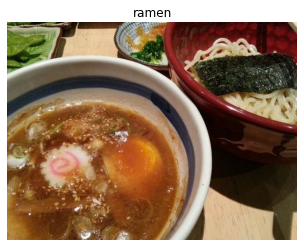

In [45]:
import random 
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

# 2.  Now to preprocess the data (Prepare for the model)


In [58]:
import tensorflow as tf

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
# rescalling 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load data from directories 
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224), batch_size=32, class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size =32,class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. create a model 
lets build an CNN model


In [35]:
# set the random seed
tf.random.set_seed(42)

# crate a model 

model_1 = tf.keras.Sequential([
                               
                               tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3)),
                               tf.keras.layers.Activation(activation="relu"),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10,activation='softmax'),
])

# Compile the model

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fitting the model

history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 538s 2s/step - loss: 2.0745 - accuracy: 0.2543 - val_loss: 1.9552 - val_accuracy: 0.3120
Epoch 2/5
235/235 [==============================] - 534s 2s/step - loss: 1.8503 - accuracy: 0.3613 - val_loss: 1.8349 - val_accuracy: 0.3648
Epoch 3/5
235/235 [==============================] - 534s 2s/step - loss: 1.4829 - accuracy: 0.4989 - val_loss: 1.9093 - val_accuracy: 0.3564
Epoch 4/5
235/235 [==============================] - 534s 2s/step - loss: 0.7858 - accuracy: 0.7471 - val_loss: 2.3678 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 543s 2s/step - loss: 0.2594 - accuracy: 0.9248 - val_loss: 3.5241 - val_accuracy: 0.2784


In [9]:
# this is the function for plotting the curves 

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [37]:
model_1.evaluate(test_data)

79/79 [==============================] - 54s 685ms/step - loss: 3.5241 - accuracy: 0.2784


[3.5241165161132812, 0.2784000039100647]

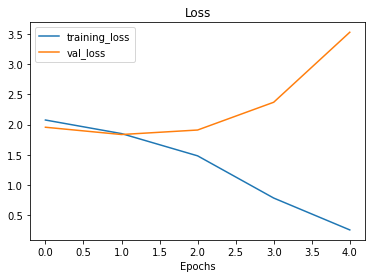

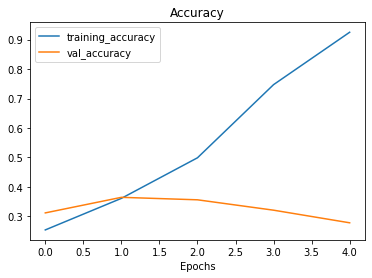

In [40]:
plot_loss_curves(history_1)

# what do these loss curves tell us
Well it seems that our model is **overfitting** the traingi data quite badly..in other words , it's getting great result on the training data but fails to generalize well to unseen data and performs poorly on the test data

# 6. Adjust the model hyperparameters (reduce overfitting)
Due to its performance on training data, it's clear our model is learning something.
however, it's not generalizing well to unseen data
* **get more data** - habing more data gives a model more oppurtunity tolearn patterns
* **simpily the model** - if our model is overfitting the data, it may be too complicated of a model . 
* **use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* **use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

In [22]:
# let's try to remove 2 convulational layer....
# set the random seed
tf.random.set_seed(42)

# crate a model 

model_2 = tf.keras.Sequential([
                               
                               tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10,activation='softmax'),
])

# Compile the model

model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fitting the model

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 191ms/step - loss: 2.1133 - accuracy: 0.2421 - val_loss: 1.9623 - val_accuracy: 0.3116
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.7973 - accuracy: 0.3848 - val_loss: 1.8389 - val_accuracy: 0.3720
Epoch 3/5
235/235 [==============================] - 48s 205ms/step - loss: 1.4844 - accuracy: 0.5095 - val_loss: 1.8832 - val_accuracy: 0.3536
Epoch 4/5
235/235 [==============================] - 48s 204ms/step - loss: 1.0374 - accuracy: 0.6789 - val_loss: 2.0794 - val_accuracy: 0.3184
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.5983 - accuracy: 0.8277 - val_loss: 2.4937 - val_accuracy: 0.3060


In [23]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.4937 - accuracy: 0.3060


[2.4937386512756348, 0.3059999942779541]

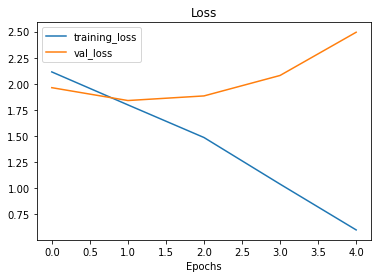

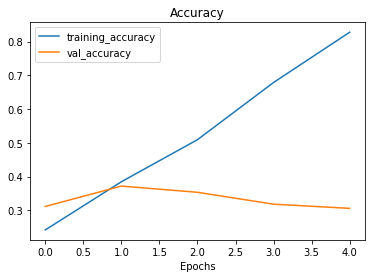

In [24]:
plot_loss_curves(history_2)

In [10]:
# Trying to reduce the overfitting with data augmentation

In [14]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True
                                             )
train_data_augmented = train_datagen.flow_from_directory(train_dir,target_size=(224,224), batch_size=32, class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [15]:
# Let's create an model 
# set the random seed
tf.random.set_seed(42)

# crate a model 

model_3 = tf.keras.Sequential([
                               
                               tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3)),
                               tf.keras.layers.Activation(activation="relu"),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10,activation='softmax'),
])

# Compile the model

model_3.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fitting the model

history_3 = model_3.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 197ms/step - loss: 2.1447 - accuracy: 0.2124 - val_loss: 2.0084 - val_accuracy: 0.2784
Epoch 2/5
235/235 [==============================] - 47s 202ms/step - loss: 1.9361 - accuracy: 0.3235 - val_loss: 1.9325 - val_accuracy: 0.3232
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.6202 - accuracy: 0.4473 - val_loss: 1.9315 - val_accuracy: 0.3396
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 1.0443 - accuracy: 0.6453 - val_loss: 2.3981 - val_accuracy: 0.2840
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.4653 - accuracy: 0.8541 - val_loss: 3.4691 - val_accuracy: 0.2688


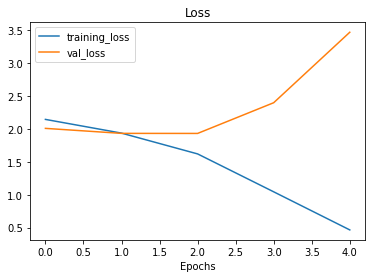

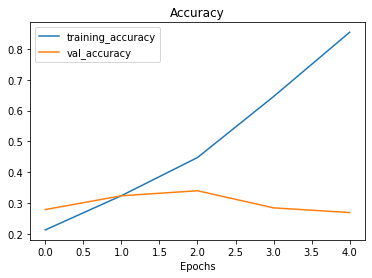

In [16]:
plot_loss_curves(history_3)

# making prediction with our model 
let's use our model to predict some custom images 


In [61]:
# making prediction with our model 
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [62]:
# now download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2022-07-17 20:44:01--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-sushi.jpeg.1’

03-sushi.jpeg.1         [ <=>                ] 138.30K  --.-KB/s    in 0.04s   

2022-07-17 20:44:02 (3.79 MB/s) - ‘03-sushi.jpeg.1’ saved [141618]

--2022-07-17 20:44:02--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1     [ <=>                ] 138.54K  --.-KB/s    in 0.04s   

2022-07-17 20:44:02 (3.62 MB/s) - ‘03-hamburger.jpeg.1’ saved [141865]

--2022-07-17

In [63]:
def load_and_prep_image(filenames, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filenames)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [64]:
# Adjust function to work with multi-class
def pred_and_plot(model, filenames, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filenames)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# make a prediction using model_10 
pred_and_plot(model=model_3,
              filenames="03-sushi.jpeg",
              class_names = class_names)